In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False
import matplotlib.cm as cm
colormap = cm.get_cmap("hsv")


C:\Users\alexk\AppData\Local\Temp\ipykernel_19548\2825479811.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("hsv")


In [2]:
def power_law(alpha,size):
    """
    Generate samples from a power-law distribution.

    Parameters:
    alpha (float): Exponent of the power-law distribution.
    x_min (float): Minimum value for the distribution.
    size (int): Number of samples to generate.

    Returns:
    numpy.ndarray: Samples from the power-law distribution.
    """
    # Generate samples from a uniform distribution
    u = np.random.uniform(size=size)
    # Compute the samples using the inverse transform method
    return ((1 - u)) ** (-1 / (alpha - 1))

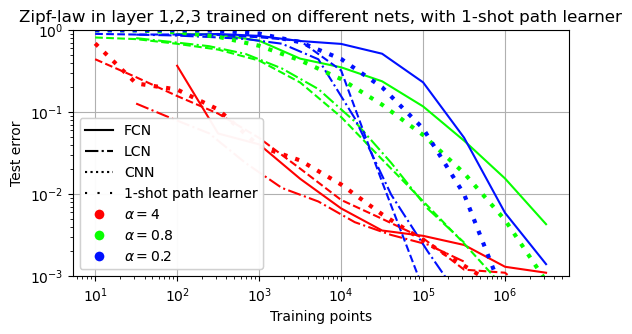

In [3]:
fcn=torch.tensor([[[63.2000],
         [94.5100],
         [95.9500],
         [98.4600],
         [99.3300],
         [99.6400],
         [99.6900],
         [99.7600],
         [99.8700],
         [99.8900]],

        [[10.2100],
         [11.5700],
         [25.5900],
         [55.0400],
         [64.7600],
         [76.2100],
         [88.2500],
         [95.5100],
         [98.4500],
         [99.5700]],

        [[12.7700],
         [10.1400],
         [14.8300],
         [26.2600],
         [32.0100],
         [48.3900],
         [76.8900],
         [95.1200],
         [99.4100],
         [99.8600]]]).squeeze()
ptr_list=torch.tensor([1.0000e+02, 3.1623e+02, 1.0000e+03, 3.1623e+03, 1.0000e+04, 3.1623e+04,
        1.0000e+05, 3.1623e+05, 1.0000e+06, 3.1623e+06], dtype=torch.float64)
plt.loglog(ptr_list,1-0.01*fcn[0],label='alpha=4',color=colormap(0/3))
plt.plot(ptr_list,1-0.01*fcn[1],label='alpha=0.8',color=colormap(1/3))
plt.plot(ptr_list,1-0.01*fcn[2],label='alpha=0.2',color=colormap(2/3))

lcn=torch.tensor([[[87.2693],
         [91.7030],
         [94.4757],
         [97.5977],
         [98.8097],
         [99.1867],
         [99.5450],
         [99.6823],
         [99.7573],
         [99.8497]],

        [[20.1140],
         [28.4633],
         [36.2077],
         [48.6367],
         [65.8840],
         [80.8640],
         [92.3117],
         [97.5950],
         [99.3343],
         [99.7430]],

        [[11.7533],
         [13.6997],
         [17.3747],
         [21.9240],
         [31.6200],
         [55.8223],
         [91.5777],
         [99.0163],
         [99.7993],
         [99.9543]]]).squeeze()
ptr_list=torch.tensor([3.1623e+01, 8.7992e+01, 2.4484e+02, 6.8129e+02, 1.8957e+03, 5.2750e+03,
        1.4678e+04, 4.0842e+04, 1.1365e+05, 3.1623e+05], dtype=torch.float64)
plt.loglog(1*ptr_list,1-0.01*lcn[0],label='alpha=4',color=colormap(0/3),linestyle="dashdot")
plt.plot(1*ptr_list,1-0.01*lcn[1],label='alpha=0.8',color=colormap(1/3),linestyle="dashdot")
plt.plot(1*ptr_list,1-0.01*lcn[2],label='alpha=0.2',color=colormap(2/3),linestyle="dashdot")








with_duplicate_overlapping=np.array([[ 55.78,  73.32,  84.27,  90.4,   95.15,  97.95,  99.15,  99.5,   99.71,  99.88,  99.89,  99.96],
 [ 18.56,  22.2,   31.82,  42.03,  57.39,  76.96,  91.27,  97.35,  99.18,  99.75,  99.93,  99.96],
 [  9.89,  11.57,  11.39,  12.67,  18.07,  25.87,  67.71,  98.59,  99.93, 100.,   100.,   100.  ],
 [ 10.49,  10.18,  10.7,   11.14,  12.11,  15.26,  24.3,   99.79, 100.,   100.,   100.,   100.  ]])
ptr_list=np.logspace(1,6.5,12)
for i in range(3):
  plt.loglog(1*ptr_list, 1-0.01*with_duplicate_overlapping[i,:],color=colormap(i/3),linestyle='--')
  
  
accurate_path_result=[[0.68897, 0.22426, 0.18864, 0.10782, 0.03836, 0.02579, 0.01311, 0.00567, 0.00273, 0.00134, 0.00066, 0.0002],
                      [0.99937, 0.99312, 0.94273, 0.83105, 0.64543, 0.42888, 0.25292, 0.12332, 0.05263, 0.01804, 0.00482, 0.00087],
                      [0.99999, 0.99989, 0.99942, 0.98724, 0.90824, 0.71389, 0.4453, 0.20111, 0.06318, 0.00997, 0.00053, 2e-05]]
  
ptr_list=np.logspace(1,6.5,12)
for i in range(3):
        
    plt.loglog(ptr_list, accurate_path_result[i], color=colormap(i/3), linestyle='dotted', dashes=(1,2),linewidth=3)

plt.xlabel("Training points")
plt.ylabel("Test error")
plt.title("Zipf-law in layer 1,2,3 trained on different nets, with 1-shot path learner")
plt.grid()
plt.legend()
plt.ylim(10**(-3),1)





color_legend = [
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(0/3), markersize=8),
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(1/3), markersize=8),
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(2/3), markersize=8),
#     plt.Line2D([0], [0], marker='o', color='white', markerfacecolor="black", markersize=8)
]
# color_labels = [r'$\gamma=0.2$', r'$\gamma=0.63$', r'$\gamma=2$', r'uniform case']
color_labels = [r'$\alpha=4$', r'$\alpha=0.8$',r"$\alpha=0.2$", r'uniform case']
linestyle_legend = [
    plt.Line2D([0], [0], linestyle="solid", color='black'),
    plt.Line2D([0], [0], linestyle="dashdot", color='black'),
    plt.Line2D([0], [0], linestyle="dotted", color='black'),
    plt.Line2D([0], [0], linestyle='dotted', dashes=(1,5), color='black')
]
linestyle_labels = ['FCN', 'LCN', "CNN", "1-shot path learner"]
# Add legends
plt.legend(linestyle_legend, linestyle_labels, loc='lower right')
plt.legend(color_legend, color_labels, loc='lower right')
plt.gca().add_artist(plt.legend(linestyle_legend + color_legend, linestyle_labels + color_labels, loc='lower left'))
plt.gca().set_aspect('equal', adjustable='box')

C:\Users\alexk\AppData\Local\Temp\ipykernel_19548\4255082594.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(10**(-4),0)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


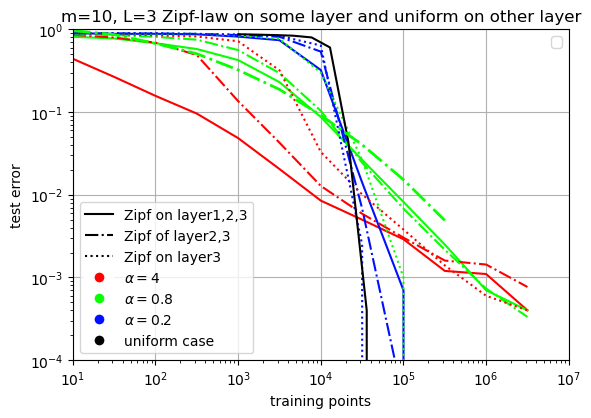

In [8]:
def path_exact(P,f_list):
  exact_f_list=np.zeros(len(f_list))
  for i in range(len(f_list)):
    exact_f_list[i]=(np.sum(f_list[:i+1]))**2-(np.sum(f_list[:i]))**2
  x=np.outer(f_list,np.outer(f_list,f_list))
  y=np.outer(f_list,np.outer(exact_f_list,exact_f_list))
  return np.sum(y*np.exp(-P*x/10))



with_duplicate_overlapping=np.array([[ 55.78,  73.32,  84.27,  90.4,   95.15,  97.95,  99.15,  99.5,   99.71,  99.88,  99.89,  99.96],
 [ 18.56,  22.2,   31.82,  42.03,  57.39,  76.96,  91.27,  97.35,  99.18,  99.75,  99.93,  99.96],
 [  9.89,  11.57,  11.39,  12.67,  18.07,  25.87,  67.71,  98.59,  99.93, 100.,   100.,   100.  ],
 [ 10.49,  10.18,  10.7,   11.14,  12.11,  15.26,  24.3,   99.79, 100.,   100.,   100.,   100.  ]])
ptr_list=np.logspace(1,6.5,12)
for i in range(3):
  plt.loglog(ptr_list, 1-0.01*with_duplicate_overlapping[i,:],color=colormap(i/3),linestyle="solid")

plt.ylim(10**(-4),0)
# plt.xlim(10,10**6.5)



ptr_list=np.logspace(1,6.5,12)
overlapping_layer23=np.array([[13.85, 20.1833, 30.7933, 50.9467, 86.41, 95.7333, 98.72, 99.41, 99.6967, 99.84, 99.8567, 99.9233],
 [12.6933, 14.4133, 18.6067, 24.83, 43.6933, 70.36, 89.6467, 97.55, 99.32, 99.7833, 99.9267, 99.9667],
 [10.1467, 10.5433, 10.9533, 11.55, 14.4567, 18.41, 46.05, 99.3167, 99.9967, 100.0, 100.0, 100.0],
 [10.5833, 10.0867, 10.83, 10.8633, 12.57, 15.5833, 29.39, 99.7867, 100.0, 100.0, 100.0, 100.0]])

for i in range(3):
  plt.plot(ptr_list,1-0.01*overlapping_layer23[i,:],color=colormap(i/3),linestyle="dashdot")

layer3_overlapping_duplicate=np.array([[10.58, 12.22, 15.1, 17.88, 27.96, 67.95, 96.7, 98.99, 99.62, 99.86, 99.94, 99.96],
 [10.15, 10.26, 11.33, 11.6, 15.25, 22.94, 69.97, 97.35, 99.9, 100.0, 100.0, 100.0],
 [10.33, 9.88, 10.11, 11.73, 13.12, 16.34, 36.02, 99.75, 100.0, 100.0, 100.0, 100.0],
 [10.05, 10.41, 9.97, 10.3, 12.86, 14.74, 23.52, 99.79, 100.0, 100.0, 100.0, 100.0]])
for i in range(3):
  plt.plot(np.logspace(1,6.5,12),1-0.01*layer3_overlapping_duplicate[i,:],color=colormap(i/3),linestyle="dotted")

plt.xlabel("training points")
plt.ylabel("test error")
plt.grid()
plt.title("m=10, L=3 Zipf-law on some layer and uniform on other layer")

uniform_result=np.array([12.56, 13.39, 14.5, 15.96, 19.94, 39.42, 95.62, 99.96, 100.0, 100.0])
plt.plot(np.logspace(3,5,10),1-0.01*uniform_result, color="black")
plt.gca().set_aspect('equal', adjustable='box')
# Create legends for colors
color_legend = [
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(0/3), markersize=8),
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(1/3), markersize=8),
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(2/3), markersize=8),
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor="black", markersize=8)
]
color_labels = [r'$\gamma=0.2$', r'$\gamma=0.63$', r'$\gamma=2$', r'uniform case']
color_labels = [r'$\alpha=4$', r'$\alpha=0.8$',r"$\alpha=0.2$", r'uniform case']
linestyle_legend = [
    plt.Line2D([0], [0], linestyle="solid", color='black'),
    plt.Line2D([0], [0], linestyle="dashdot", color='black'),
    plt.Line2D([0], [0], linestyle="dotted", color='black')
]
linestyle_labels = ['Zipf on layer1,2,3', 'Zipf of layer2,3', 'Zipf on layer3']
# Add legends
plt.legend(linestyle_legend, linestyle_labels, loc='lower right')
plt.legend(color_legend, color_labels, loc='lower right')
plt.gca().add_artist(plt.legend(linestyle_legend + color_legend, linestyle_labels + color_labels, loc='lower left'))
plt.gca().set_aspect('equal', adjustable='box')




m=10
alpha=4
f_list=np.zeros(m)
for i in range(m):
  f_list[i]=(i+1)**(-1-alpha)
f_list/=np.sum(f_list)
f_list1=f_list
f_list2=f_list
f_list3=f_list

x=np.outer(np.outer(f_list1,f_list2),f_list3)

def path(P):
    mask = x > 10/P
    x_masked = np.where(mask, x, 0)
    return x_masked
x=x.reshape(-1)
ptr_list=np.logspace(1,6.5,20)
error_list=np.zeros(20)
for i in range(20):
  # error_list[i]=1-np.sum(path(ptr_list[i]))**4
  error_list[i]=4*x@np.exp(-x*ptr_list[i]/5)
  error_list[i]=path_exact(ptr_list[i],f_list)
# plt.loglog(ptr_list,error_list,color=colormap(0/3),linestyle='dotted',linewidth=2)
plt.gca().set_aspect('equal', adjustable='box')
plt.ylim(10**(-4),1)
plt.xlim(10**1.5,10**7)
plt.grid()


m=10
alpha=0.8
f_list=np.zeros(m)
for i in range(m):
  f_list[i]=(i+1)**(-1-alpha)
f_list/=np.sum(f_list)
f_list1=f_list
f_list2=f_list
f_list3=f_list

x=np.outer(np.outer(f_list1,f_list2),f_list3)
def path(P):
    mask = x >= 10/P
    x_masked = np.where(mask, x, 0)
    return x_masked
x=x.reshape(-1)
ptr_list=np.logspace(1,6.5,20)
error_list=np.zeros(20)
for i in range(20):
  # error_list[i]=1-np.sum(path(ptr_list[i]))**4
  error_list[i]=4*x@np.exp(-x*ptr_list[i]/5)
  error_list[i]=path_exact(ptr_list[i],f_list)
# plt.loglog(ptr_list,error_list,color=colormap(1/3),linestyle='dotted',linewidth=2)
plt.gca().set_aspect('equal', adjustable='box')
plt.ylim(10**(-4),1)
plt.xlim(10**1,10**7)



m=10
alpha=0.2
f_list=np.zeros(m)
for i in range(m):
  f_list[i]=(i+1)**(-1-alpha)
f_list/=np.sum(f_list)
f_list1=f_list
f_list2=f_list
f_list3=f_list

x=np.outer(np.outer(f_list1,f_list2),f_list3)
def path(P):
    mask = x >= 10/P
    x_masked = np.where(mask, x, 0)
    return x_masked

ptr_list=np.logspace(1,6.5,20)
error_list=np.zeros(20)
x=x.reshape(-1)
for i in range(20):
  error_list[i]=1-np.sum(path(ptr_list[i]))**4
  # error_list[i]=4*x@np.exp(-x*ptr_list[i]/5)
  # error_list[i]=path_exact(ptr_list[i],f_list)
# plt.loglog(ptr_list,error_list,color=colormap(2/3),linestyle='dotted',linewidth=2)
plt.gca().set_aspect('equal', adjustable='box')
plt.ylim(10**(-4),1)
plt.xlim(10**1,10**7)


layer123_02_08=torch.tensor([[[ 10.5000],
         [ 13.2900],
         [ 15.3400],
         [ 17.1800],
         [ 28.8500],
         [ 47.8500],
         [ 77.9700],
         [ 97.0600],
         [ 99.7600],
         [ 99.9800],
         [100.0000],
         [100.0000]],

        [[ 16.5500],
         [ 18.5100],
         [ 23.5600],
         [ 38.9600],
         [ 54.6900],
         [ 73.4900],
         [ 88.7600],
         [ 96.7600],
         [ 99.1300],
         [ 99.7700],
         [ 99.9300],
         [100.0000]]]).squeeze(2)
# plt.plot(np.logspace(1,6.5,12), 1-0.01*layer123_02_08[0], color=colormap(2/3))
# plt.plot(np.logspace(1,6.5,12), 1-0.01*layer123_02_08[1], color=colormap(1/3))


m=10
alpha=0.2
f_list=np.zeros(m)
for i in range(m):
  f_list[i]=(i+1)**(-1-alpha)
f_list/=np.sum(f_list)
f_list1=f_list
f_list2=f_list
f_list3=f_list

x=np.outer(np.outer(f_list1,f_list2),f_list3)
def path(P):
    mask = x >= 10/P
    x_masked = np.where(mask, x, 0)
    return x_masked

ptr_list=np.logspace(1,6.5,20)
error_list=np.zeros(20)
for i in range(20):
  error_list[i]=1-np.sum(path(ptr_list[i]))**1
# plt.loglog(ptr_list,error_list,color=colormap(2/3),linestyle='dotted',linewidth=2)

m=10
alpha=0.8
f_list=np.ones(m)/m
for i in range(m):
  f_list[i]=(i+1)**(-1-alpha)
f_list/=np.sum(f_list)
f_list1=f_list
f_list2=f_list
f_list3=f_list

x=np.outer(np.outer(f_list1,f_list2),f_list3)
def path(P):
    mask = x >= 10/P
    x_masked = np.where(mask, x, 0)
    return x_masked
x=x.reshape(-1)
ptr_list=np.logspace(1,6.5,20)
error_list=np.zeros(20)
for i in range(20):
  error_list[i]=1-np.sum(path(ptr_list[i]))**1
  # error_list[i]=4*x@np.exp(-x*ptr_list[i]/5)
  # error_list[i]=path_exact(ptr_list[i],f_list)
# plt.loglog(ptr_list,error_list,color=colormap(1/3),linestyle='dotted',linewidth=2)


m=10
alpha=4
f_list=np.ones(m)/m
for i in range(m):
  f_list[i]=(i+1)**(-1-alpha)
f_list/=np.sum(f_list)
f_list1=f_list
f_list2=f_list
f_list3=f_list

x=np.outer(np.outer(f_list1,f_list2),f_list3)
def path(P):
    mask = x >= 10/P
    x_masked = np.where(mask, x, 0)
    return x_masked
x=x.reshape(-1)
ptr_list=np.logspace(1,6.5,20)
error_list=np.zeros(20)
for i in range(20):
  error_list[i]=1-np.sum(path(ptr_list[i]))**1
  # error_list[i]=4*x@np.exp(-x*ptr_list[i]/5)
  # error_list[i]=path_exact(ptr_list[i],f_list)
# plt.loglog(ptr_list,error_list,color=colormap(0/3),linestyle='dotted',linewidth=2)

# plt.loglog(np.logspace(1,5.5,10),1-0.01*np.array([69.5157, 89.6995, 91.7000, 94.8225, 98.1253, 98.9770, 99.5210, 99.8065,
#         99.9072, 99.9500]),color=colormap(0/3), linestyle="dashdot", linewidth=2)

plt.loglog(np.logspace(1,5.5,10),np.array([0.96886, 0.8658575, 0.6773525, 0.508435, 0.3237975, 0.1880925, 0.091695, 0.0403875, 0.01524, 0.004895]),color=colormap(1/3), linestyle="dashdot", linewidth=2)
m=10
alpha=-1
f_list=np.ones(m)/m
for i in range(m):
  f_list[i]=(i+1)**(-1-alpha)
f_list/=np.sum(f_list)
f_list1=f_list
f_list2=f_list
f_list3=f_list

x=np.outer(np.outer(f_list1,f_list2),f_list3)
def path(P):
    mask = x >= 10/P
    x_masked = np.where(mask, x, 0)
    return x_masked
x=x.reshape(-1)
ptr_list=np.logspace(1,6.5,20)
error_list=np.zeros(20)
for i in range(20):
  error_list[i]=1-np.sum(path(ptr_list[i]))**2
  # error_list[i]=4*x@np.exp(-x*ptr_list[i]/5)
  # error_list[i]=path_exact(ptr_list[i],f_list)
# plt.loglog(ptr_list,error_list,color='black',linestyle='dotted',linewidth=2)

# accurate_layer123=np.array([[74.7600, 75.0200, 94.7600, 96.3100, 97.8400, 99.1200, 99.6800, 99.7300,
#         99.9000, 99.9300],[1.0002e-02, 5.8500e+00, 1.5860e+01, 3.2450e+01, 5.2070e+01, 7.0070e+01,
#         8.2550e+01, 9.1280e+01, 9.6080e+01, 9.8630e+01],[0.0000e+00, 4.0001e-02, 1.1500e+00, 5.4600e+00, 1.9210e+01, 4.0370e+01,
#         6.4270e+01, 8.3560e+01, 9.4120e+01, 9.8500e+01]])

# for i in range(3):
#   plt.plot(np.logspace(1,5.5,10)/5,1-0.01*accurate_layer123[i,:],color=colormap(i/3),linestyle="dotted")


plt.gca().set_aspect('equal', adjustable='box')
plt.ylim(10**(-4),1)
plt.xlim(10**1,10**7)
plt.legend()
plt.grid()



at_least_2=torch.tensor([[0.4023, 0.10944, 0.08094, 0.06482, 0.02038, 0.00835, 0.00394, 0.00179, 0.00075, 0.00044],
                         [0.99978, 0.96989, 0.81494, 0.61032, 0.37974, 0.20541, 0.0886, 0.03168, 0.00808, 0.00163],
                          [0.99912, 0.99907, 0.98355, 0.91363, 0.72142, 0.44082, 0.19283, 0.0539, 0.00757, 0.00045]])
# for i in range(3):
#   plt.loglog(np.logspace(1,5.5,10), at_least_2[i,:],color=colormap(i/3),linestyle="dashdot")
# at_least_3=torch.tensor([[0.16494, 0.04145, 0.03281, 0.01857, 0.00444, 0.0029, 0.00079, 0.0004, 0.0001, 6e-05],
#                          [0.98688, 0.856, 0.60367, 0.35626, 0.17752, 0.07357, 0.02318, 0.00525, 0.00085, 0.00017],
#                          [0.99545, 0.98403, 0.92343, 0.7302, 0.46463, 0.21017, 0.06126, 0.00959, 0.00058, 1e-05]
#                          ])
# for i in range(3):
#   plt.loglog(np.logspace(1,5.5,10), at_least_3[i,:],color=colormap(i/3),linestyle="dashdot",marker='d')
# lcn_uniform=torch.tensor([[[ 13.0200],
#          [ 18.4200],
#          [ 98.9600],
#          [ 99.9200],
#          [100.0000]]]).squeeze()
# ptr_list=torch.tensor([  3162.2777,  10000.0000,  31622.7766, 100000.0000, 316227.7660],
#        dtype=torch.float64)
# plt.loglog(ptr_list,1-0.01*lcn_uniform, color="black", linestyle="dashdot")

In [ ]:
t_07_l123_f=power_law(1.2,size=(1000*10))
t_07_l123_f=t_07_l123_f.reshape(1000,10)
for i in range(t_07_l123_f.shape[0]):
  t_07_l123_f[i,:]=t_07_l123_f[i,:]/np.sum(t_07_l123_f[i,:])
t_07_l123_f=t_07_l123_f.reshape(-1)

t_02_l123_f=power_law(1.63,size=(1000*10))
t_02_l123_f=t_02_l123_f.reshape(1000,10)
for i in range(t_02_l123_f.shape[0]):
  t_02_l123_f[i,:]=t_02_l123_f[i,:]/np.sum(t_02_l123_f[i,:])
t_02_l123_f=t_02_l123_f.reshape(-1)

t_03_l123_f=power_law(3,size=(1000*10))
t_03_l123_f=t_03_l123_f.reshape(1000,10)
for i in range(t_03_l123_f.shape[0]):
  t_03_l123_f[i,:]=t_03_l123_f[i,:]/np.sum(t_03_l123_f[i,:])
t_03_l123_f=t_03_l123_f.reshape(-1)

t_08_l123_f=power_law(7.3,size=(1000*10))
t_08_l123_f=t_08_l123_f.reshape(1000,10)
for i in range(t_08_l123_f.shape[0]):
  t_08_l123_f[i,:]=t_08_l123_f[i,:]/np.sum(t_08_l123_f[i,:])
t_08_l123_f=t_08_l123_f.reshape(-1)

1.0
Slope (Power Law Exponent): 0.46390247837272175
1.0
Slope (Power Law Exponent): 1.052640210276551
1.0
Slope (Power Law Exponent): 1.6224407720027567
1.0
Slope (Power Law Exponent): 1.791559759954636


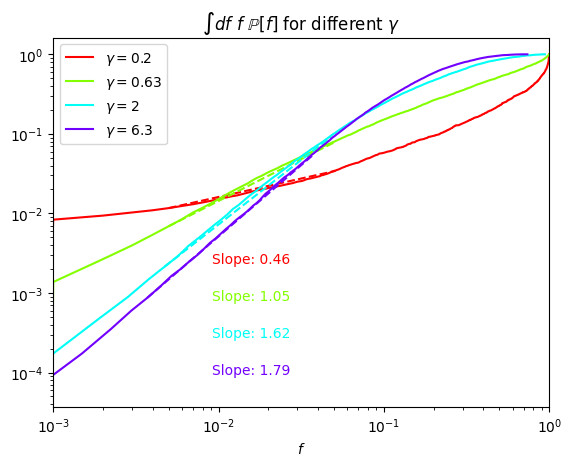

In [ ]:
bin_num=1000
n_07_l123_f,bins_07_l123_f,_=plt.hist(t_07_l123_f,bins=bin_num)
n_02_l123_f,bins_02_l123_f,_=plt.hist(t_02_l123_f,bins=bin_num)
n_03_l123_f,bins_03_l123_f,_=plt.hist(t_03_l123_f,bins=bin_num)
n_08_l123_f,bins_08_l123_f,_=plt.hist(t_08_l123_f,bins=bin_num)
plt.close()



for i in range(len(n_07_l123_f)):
  n_07_l123_f[i]*=(bins_07_l123_f[i+1])/1
new_n_07_l123_f=np.zeros(len(n_07_l123_f))
for i in range(len(n_07_l123_f)):
  new_n_07_l123_f[i]=np.sum(n_07_l123_f[:i])
new_n_07_l123_f=new_n_07_l123_f/new_n_07_l123_f[len(n_07_l123_f)-1]
print(new_n_07_l123_f[999])
plt.title(r"$\int df \ f\ \mathbb{P}[f]$ when $\gamma=0.63$")
plt.xlabel(r"$f$")
plt.loglog(1,1)
plt.loglog(bins_07_l123_f[:-1],new_n_07_l123_f,label=f"$\gamma=0.2$", color=colormap(0/4))
# plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(10**(-3),1)

x1, x2 = bins_07_l123_f[5], bins_07_l123_f[-950]  # Endpoints in linear space
y1, y2 = new_n_07_l123_f[5], new_n_07_l123_f[-950]  # Corresponding values
slope = np.log(y2 / y1) / np.log(x2 / x1)
print("Slope (Power Law Exponent):", slope)

# Plot the line with the calculated slope
plt.plot([x1, x2], [y1, y2], linestyle='--', color=colormap(0/4))
plt.text(0.4, 0.4, f'Slope: {slope:.2f}', ha='center', va='center', transform=plt.gca().transAxes, color=colormap(0/4))




for i in range(len(n_02_l123_f)):
  n_02_l123_f[i]*=(bins_02_l123_f[i+1])/1
new_n_02_l123_f=np.zeros(len(n_02_l123_f))
for i in range(len(n_02_l123_f)):
  new_n_02_l123_f[i]=np.sum(n_02_l123_f[:i])
new_n_02_l123_f=new_n_02_l123_f/new_n_02_l123_f[len(n_02_l123_f)-1]
print(new_n_02_l123_f[999])
plt.title(r"$\int df \ f\ \mathbb{P}[f]$ when $\gamma=0.63$")
plt.xlabel(r"$f$")
plt.loglog(1,1)
plt.loglog(bins_02_l123_f[:-1],new_n_02_l123_f,label=f"$\gamma=0.63$", color=colormap(1/4))
# plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(10**(-3),1)

x1, x2 = bins_02_l123_f[5], bins_02_l123_f[-950]  # Endpoints in linear space
y1, y2 = new_n_02_l123_f[5], new_n_02_l123_f[-950]  # Corresponding values
slope = np.log(y2 / y1) / np.log(x2 / x1)
print("Slope (Power Law Exponent):", slope)

# Plot the line with the calculated slope
plt.plot([x1, x2], [y1, y2], linestyle='--', color=colormap(1/4))
plt.text(0.4, 0.3, f'Slope: {slope:.2f}', ha='center', va='center', transform=plt.gca().transAxes, color=colormap(1/4))




for i in range(len(n_03_l123_f)):
  n_03_l123_f[i]*=(bins_03_l123_f[i+1])/1
new_n_03_l123_f=np.zeros(len(n_03_l123_f))
for i in range(len(n_03_l123_f)):
  new_n_03_l123_f[i]=np.sum(n_03_l123_f[:i])
new_n_03_l123_f=new_n_03_l123_f/new_n_03_l123_f[len(n_03_l123_f)-1]
print(new_n_03_l123_f[999])
plt.title(r"$\int df \ f\ \mathbb{P}[f]$ when $\gamma=0.63$")
plt.xlabel(r"$f$")
plt.loglog(1,1)
plt.loglog(bins_03_l123_f[:-1],new_n_03_l123_f,label=f"$\gamma=2$", color=colormap(2/4))
# plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(10**(-3),1)

x1, x2 = bins_03_l123_f[5], bins_03_l123_f[-950]  # Endpoints in linear space
y1, y2 = new_n_03_l123_f[5], new_n_03_l123_f[-950]  # Corresponding values
slope = np.log(y2 / y1) / np.log(x2 / x1)
print("Slope (Power Law Exponent):", slope)

# Plot the line with the calculated slope
plt.plot([x1, x2], [y1, y2], linestyle='--', color=colormap(2/4))
plt.text(0.4, 0.2, f'Slope: {slope:.2f}', ha='center', va='center', transform=plt.gca().transAxes, color=colormap(2/4))




for i in range(len(n_08_l123_f)):
  n_08_l123_f[i]*=(bins_08_l123_f[i+1])/1
new_n_08_l123_f=np.zeros(len(n_08_l123_f))
for i in range(len(n_08_l123_f)):
  new_n_08_l123_f[i]=np.sum(n_08_l123_f[:i])
new_n_08_l123_f=new_n_08_l123_f/new_n_08_l123_f[len(n_08_l123_f)-1]
print(new_n_08_l123_f[999])
plt.title(r"$\int df \ f\ \mathbb{P}[f]$ when $\gamma=0.63$")
plt.xlabel(r"$f$")
plt.loglog(1,1)
plt.loglog(bins_08_l123_f[:-1],new_n_08_l123_f,label=f"$\gamma=6.3$", color=colormap(3/4))
# plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(10**(-3),1)

x1, x2 = bins_08_l123_f[5], bins_08_l123_f[-950]  # Endpoints in linear space
y1, y2 = new_n_08_l123_f[5], new_n_08_l123_f[-950]  # Corresponding values
slope = np.log(y2 / y1) / np.log(x2 / x1)
print("Slope (Power Law Exponent):", slope)

# Plot the line with the calculated slope
plt.plot([x1, x2], [y1, y2], linestyle='--', color=colormap(3/4))
plt.text(0.4, 0.1, f'Slope: {slope:.2f}', ha='center', va='center', transform=plt.gca().transAxes, color=colormap(3/4))

plt.legend()
plt.title(r"$\int df \ f\ \mathbb{P}[f]$ for different $\gamma$")
plt.xlabel(r"$f$")


new_n_07_l123_f=1-new_n_07_l123_f
new_n_02_l123_f=1-new_n_02_l123_f
new_n_03_l123_f=1-new_n_03_l123_f
new_n_08_l123_f=1-new_n_08_l123_f

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rc('text', usetex=False)
import torch


def find_closest(arr, val):
       idx = np.abs(arr - val).argmin()
      #  if idx>bin_num-1:
      #   idx=bin_num-1
       return idx


epsilon_list=np.logspace(-0.7,0.8,4)


n1=np.vstack((new_n_07_l123_f,new_n_02_l123_f,new_n_03_l123_f,new_n_08_l123_f))
n2=np.vstack((new_n_07_l123_f,new_n_02_l123_f,new_n_03_l123_f,new_n_08_l123_f))
n3=np.vstack((new_n_07_l123_f,new_n_02_l123_f,new_n_03_l123_f,new_n_08_l123_f))

bins_layer1=np.vstack((bins_07_l123_f,bins_02_l123_f,bins_03_l123_f,bins_08_l123_f))
bins_layer2=np.vstack((bins_07_l123_f,bins_02_l123_f,bins_03_l123_f,bins_08_l123_f))
bins_layer3=np.vstack((bins_07_l123_f,bins_02_l123_f,bins_03_l123_f,bins_08_l123_f))


def b(P,k):
  g_P=10/P
  g_P_index=find_closest(bins_layer3[k,:],g_P)
  # print(g_P_index)
  sum=0
  normalization=0

  for bins3 in np.linspace(g_P_index,bin_num-1,bin_num-1-g_P_index+1):
    bin2_min=find_closest(bins_layer2[k,:],g_P/bins_layer3[k,int(bins3)])
    for bins2 in np.linspace(bin2_min,bin_num-1,bin_num-1-bin2_min+1):
        bins1_min=find_closest(bins_layer1[k,:],g_P/(bins_layer3[k,int(bins3)]*bins_layer2[k,int(bins2)]))
        for bins1 in np.linspace(bins1_min,bin_num-1,bin_num-1-bins1_min+1):
            sum+=n3[int(k),int(bins3)]*n2[int(k),int(bins2)]*n1[int(k),int(bins1)]
  for bins3 in np.linspace(0,bin_num-1,bin_num):
    for bins2 in np.linspace(0,bin_num-1,bin_num):
        for  bins1 in np.linspace(0,bin_num-1,bin_num):
            normalization+=n3[int(k),int(bins3)]*n2[int(k),int(bins2)]*n1[int(k),int(bins1)]
  return sum/normalization



In [ ]:
for k,temperature in enumerate(np.logspace(-0.7,0.8,4)):
  for i,ptr in enumerate(np.logspace(1,5.5,20)):
    print(b(ptr,k))

KeyboardInterrupt: 

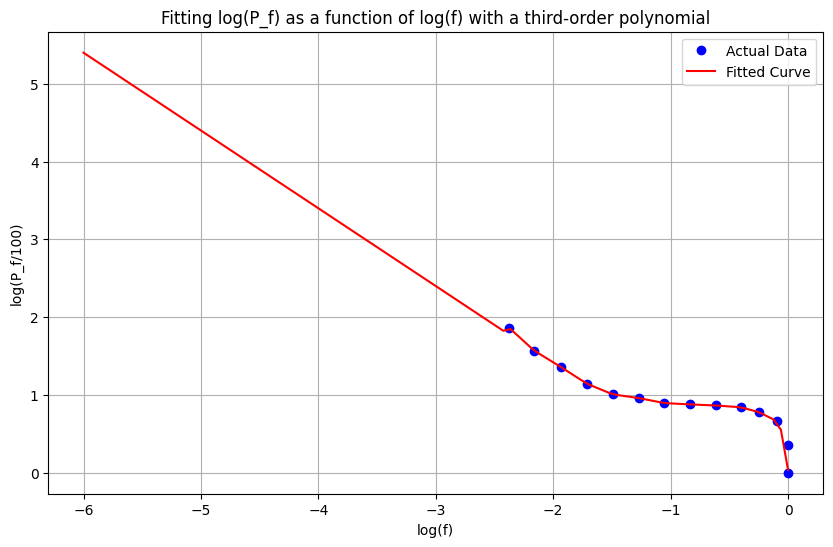

In [ ]:
import torch
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
# Define the function to fit
def model_func(log_f, c, d, e, f):
    return  c * log_f**3 + d * log_f**2 + e * log_f + f
# def model_func(log_f, f):
#     return  -log_f + f

# Actual data
P_f_layer3 = torch.tensor([1000,2300, 4600, 6000, 6949, 7317, 7556, 7860, 9113, 10182, 13971, 22911, 37029, 73250])/1000
f_list_layer3 = torch.tensor([1,0.9913, 0.805, 0.566, 0.3954, 0.2419, 0.1468, 0.0886, 0.0534, 0.0321, 0.0193, 0.0116, 0.0069, 0.0042], dtype=torch.float64)

# Take logarithms of data
log_P_f_layer3 = torch.log10(P_f_layer3)
log_f_list_layer3 = torch.log10(f_list_layer3)


def model_func(log_f):
    if -2.3767507096020997< log_f <=-0:
        interp_func = interp1d(log_f_list_layer3, log_P_f_layer3, kind='linear')
        return interp_func(log_f)
    else:
        return -(log_f + 2.4) +1.8




# Fit the model to the data
# popt, _ = curve_fit(model_func, log_f_list_layer3, log_P_f_layer3)
# popt=[-0.5534622782834162 ,-1.727630702643167, -1.783787291725454, 1.2898437238886448]
# Generate predicted values
log_f_values = np.linspace(-6, -0.0004, 100)
predicted_log_P_f=np.zeros(len(log_f_values))
for i,a in enumerate(log_f_values):
  predicted_log_P_f[i]= model_func(a)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(log_f_list_layer3, log_P_f_layer3, 'bo', label='Actual Data')
plt.plot(log_f_values, predicted_log_P_f, 'r-', label='Fitted Curve')
plt.xlabel('log(f)')
plt.ylabel('log(P_f/100)')
plt.title('Fitting log(P_f) as a function of log(f) with a third-order polynomial')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Optimized Parameters: 1.0 1.0 -6.473486041654771 29.934736326568018 -46.545574093617816 26.50568643020985 -4.685105186462565 -0.006450266364965362


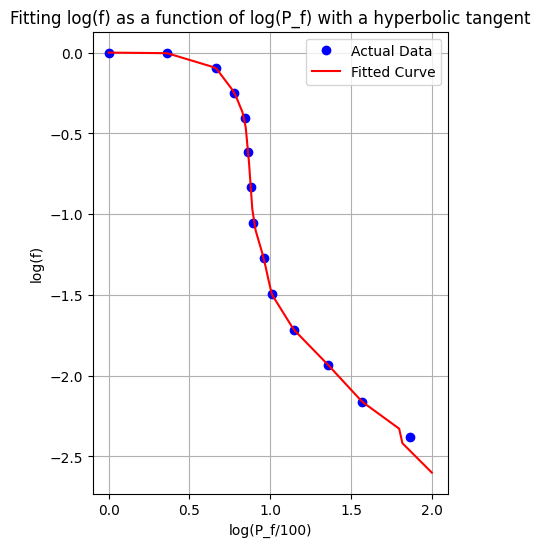

In [ ]:
import torch
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
# Define the hyperbolic tangent function to fit
def inverse_func(log_Pf, a, b, c, d, e, f, g, h):
    return 0* log_Pf**7 + 0 * log_Pf**6 + c * log_Pf**5 + d * log_Pf**4 + e * log_Pf**3 + f * log_Pf**2 + g * log_Pf + h


# Actual data
P_f_layer3 = torch.tensor([1000,2300, 4600, 6000, 6949, 7317, 7556, 7860, 9113, 10182, 13971, 22911, 37029, 73250], dtype=torch.float64) / 1000
f_list_layer3 = torch.tensor([1,0.9913, 0.805, 0.566, 0.3954, 0.2419, 0.1468, 0.0886, 0.0534, 0.0321, 0.0193, 0.0116, 0.0069, 0.0042], dtype=torch.float64)

# Take logarithms of data
log_P_f_layer3 = torch.log10(P_f_layer3)
log_f_list_layer3 = torch.log10(f_list_layer3)

# Fit the inverse to the data
popt2, _ = curve_fit(inverse_func, log_P_f_layer3, log_f_list_layer3, maxfev=10000)


def inverse_func(log_Pf_minus2):
    if 0 < log_Pf_minus2 < 1.8:
        interp_func = interp1d(log_P_f_layer3, log_f_list_layer3, kind='linear')
        return interp_func(log_Pf_minus2)
    elif log_Pf_minus2 <= 0:
        return 0
    elif log_Pf_minus2 >= 1.8:
        return -(log_Pf_minus2 - 1.8) - 2.4


# Generate predicted values
log_Pf_values = np.linspace(min(log_P_f_layer3), 2, 100)
predicted_log_f=np.zeros(len(log_Pf_values))
# predicted_log_f = inverse_func(log_Pf_values, *popt2)
for i,a in enumerate(log_Pf_values):
  predicted_log_f[i]=inverse_func(log_Pf_values[i])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(log_P_f_layer3, log_f_list_layer3, 'bo', label='Actual Data')
plt.plot(log_Pf_values, predicted_log_f, 'r-', label='Fitted Curve')
plt.xlabel('log(P_f/100)')
plt.ylabel('log(f)')
plt.title('Fitting log(f) as a function of log(P_f) with a hyperbolic tangent')
plt.legend()
plt.grid(True)

print("Optimized Parameters:", *popt2)

plt.gca().set_aspect('equal', adjustable='box')

plt.show()




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rc('text', usetex=False)
import torch


def find_closest(arr, val):
       idx = np.abs(arr - val).argmin()
      #  if idx>bin_num-1:
      #   idx=bin_num-1
       return idx


epsilon_list=np.logspace(-0.7,0.8,4)


n1=np.vstack((new_n_07_l123_f,new_n_02_l123_f,new_n_03_l123_f,new_n_08_l123_f))
n2=np.vstack((new_n_07_l123_f,new_n_02_l123_f,new_n_03_l123_f,new_n_08_l123_f))
n3=np.vstack((new_n_07_l123_f,new_n_02_l123_f,new_n_03_l123_f,new_n_08_l123_f))

bins_layer1=np.vstack((bins_07_l123_f,bins_02_l123_f,bins_03_l123_f,bins_08_l123_f))
bins_layer2=np.vstack((bins_07_l123_f,bins_02_l123_f,bins_03_l123_f,bins_08_l123_f))
bins_layer3=np.vstack((bins_07_l123_f,bins_02_l123_f,bins_03_l123_f,bins_08_l123_f))


def b(P,k):
  g_P=inverse_func(np.log10(P)-1)
  g_P_index=find_closest(bins_layer3[k,:],np.power(10,g_P))
  # print(f"P={P}, 10^g_P={np.power(10,g_P)}")
  # print(g_P_index)
  sum=0
  normalization=0

  for bins3 in np.linspace(g_P_index,bin_num-1,bin_num-1-g_P_index+1):
    bin2_min=find_closest(bins_layer2[k,:], np.power(10,inverse_func(np.log10(P)-1-model_func(np.log10(bins_layer3[k,int(bins3)]))) ))
    # print( np.power(10,inverse_func(np.log10(P)-1-model_func(np.log10(bins_layer3[k,int(bins3)]))) ))
    for bins2 in np.linspace(bin2_min,bin_num-1,bin_num-1-bin2_min+1):
        bins1_min=find_closest(bins_layer1[k,:], np.power(10,inverse_func(np.log10(P)-1-model_func(np.log10(bins_layer3[k,int(bins3)])) -model_func(np.log10(bins_layer2[k,int(bins2)]))) ))
        # print( np.power(10,inverse_func(np.log10(P)-1-model_func(np.log10(bins_layer3[k,int(bins3)])) -model_func(np.log10(bins_layer2[k,int(bins2)]))) ))
        for bins1 in np.linspace(bins1_min,bin_num-1,bin_num-1-bins1_min+1):
            sum+=n3[int(k),int(bins3)]*n2[int(k),int(bins2)]*n1[int(k),int(bins1)]
  for bins3 in np.linspace(0,bin_num-1,bin_num):
    for bins2 in np.linspace(0,bin_num-1,bin_num):
        for  bins1 in np.linspace(0,bin_num-1,bin_num):
            normalization+=n3[int(k),int(bins3)]*n2[int(k),int(bins2)]*n1[int(k),int(bins1)]
  return sum/normalization



In [ ]:
x=np.zeros((2,10))
for k,temperature in enumerate(np.logspace(-0.7,-0.2,1)):
  for i,ptr in enumerate(np.logspace(2,5.5,1)):
    print(b(ptr,k))
#     x[k,i]=b(ptr,k)
# print(torch.tensor(x))

In [ ]:
import numpy as np

accurate_theory_powerlaw_layer123 = [
    0.0, 0.0, 0.0, 0.0, 0.0, 1.2238529700139054e-06, 8.784598918328572e-05, 0.0013870329057282262,
    0.01195634797817494, 0.07525241725878448, 0.26903529384398395, 0.7016292544435904, 0.8816325464137018,
    0.9226676317129019, 0.9450416661528456, 0.9568182346018914, 0.9594876415496724, 0.9598854107243865,
    0.9602492082060984, 0.9602628293140388, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.295016023912597e-07,
    1.1310284154659646e-05, 0.0003837982183532101, 0.006700778972635103, 0.07054740724743776, 0.42173369635680197,
    0.7612156964363866, 0.8504206977702321, 0.9099667635853755, 0.9277229206515812, 0.9318062272799608,
    0.9425604389841545, 0.9596230695844556, 0.9622559913283328, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0028957763106859536, 0.05170467612737936, 0.7481610556516695, 0.9254529304951807,
    0.9684755858501647, 1.0, 1.0, 1.0, 1.0, 1.0,   0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
]
accurate_theory_powerlaw_layer123=[[3.4305e-07, 9.8439e-05, 5.2520e-03, 9.6281e-02, 6.0419e-01, 9.0584e-01,
         9.4794e-01, 9.6069e-01, 9.6174e-01, 9.6181e-01],
        [0.0000e+00, 5.8001e-08, 7.9253e-05, 1.0173e-02, 3.1146e-01, 8.1742e-01,
         9.1604e-01, 9.3314e-01, 9.5473e-01, 9.6352e-01],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.1363e-02, 8.6348e-01,
         9.7635e-01, 1.0000e+00, 1.0000e+00, 1.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
         1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]],



accurate_theory_powerlaw_layer123 = np.array(accurate_theory_powerlaw_layer123).reshape(4, 10)
inner_exponent=4
exponent=1
plt.loglog(np.logspace(1,5.5,10),(1-accurate_theory_powerlaw_layer123[0,:]**inner_exponent-2*accurate_theory_powerlaw_layer123[0,:]**3*(1-accurate_theory_powerlaw_layer123[0,:]))**exponent,label="predicted $\gamma=10^{-0.7}$",linestyle="dotted",color=colormap(0/4),linewidth=2)
plt.loglog(np.logspace(1,5.5,10),(1-accurate_theory_powerlaw_layer123[1,:]**inner_exponent-2*accurate_theory_powerlaw_layer123[1,:]**3*(1-accurate_theory_powerlaw_layer123[1,:]))**exponent,label="predicted $\gamma=10^{-0.2}$",linestyle="dotted",color=colormap(1/4),linewidth=2)
plt.loglog(np.logspace(1,5.5,10),(1-accurate_theory_powerlaw_layer123[2,:]**inner_exponent-2*accurate_theory_powerlaw_layer123[2,:]**3*(1-accurate_theory_powerlaw_layer123[2,:]))**exponent,label="predicted $\gamma=10^{0.3}$",linestyle="dotted",color=colormap(2/4),linewidth=2)
plt.loglog(np.logspace(1,5.5,10),(1-accurate_theory_powerlaw_layer123[3,:]**inner_exponent-2*accurate_theory_powerlaw_layer123[3,:]**3*(1-accurate_theory_powerlaw_layer123[3,:]))**exponent,label="predicted $\gamma=10^{0.8}$",linestyle="dotted",color=colormap(3/4),linewidth=2)

t_minus07_result_layer123=np.array([16.698, 15.832, 21.274, 22.758, 25.294, 33.148, 43.105, 55.473, 71.923, 86.333, 93.383, 96.042, 98.083, 99.011])
t_minus02_result_layer123= np.array([ 11.5014,  12.3956,  11.4058,  11.0821,  12.2914,  14.1676,  16.1080,17.3717,  20.7133,  25.5930,  39.9408,  65.9550,  91.0312,  97.3410,99.1595,  99.6797,  99.7524,  99.9345,  99.9646,  99.9771])
t_03_result_layer123= np.array([ 10.0037,  10.5374,  10.0639,  10.6089,  10.4195,  10.8684,  11.5584,11.8029,  12.8400,  13.9859,  16.1736,  20.7231,  62.5847,  99.1077,99.9415,  99.9827,  99.9997, 100.0000, 100.0000, 100.0000])
t_08_result_layer123= np.array([ 10.1229,  10.0440,  10.2955,  10.1304,  10.2285,  10.2668,  10.4928,10.9058,  11.5498,  12.2330,  13.3725,  14.4281,  20.0094,  98.3547,99.9763,  99.9977, 100.0000, 100.0000, 100.0000, 100.0000])

plt.loglog(np.logspace(1,np.log10(11993),14),1-0.01*t_minus07_result_layer123,marker='x',label="$\gamma=10^{-0.7}$",color=colormap(0/4))
plt.loglog(np.logspace(1,5.5,20),1-0.01*t_minus02_result_layer123,marker='x',label="$\gamma=10^{-0.2}$",color=colormap(1/4))
plt.loglog(np.logspace(1,5.5,20),1-0.01*t_03_result_layer123,marker='x',label="$\gamma=10^{0.3}$",color=colormap(2/4))
plt.loglog(np.logspace(1,5.5,20),1-0.01*t_08_result_layer123,marker='x',label="$\gamma=10^{0.8}$",color=colormap(3/4))
# plt.plot(np.logspace(1,9.5,10),1-np.array([0.0000, 0.0000, 0.0000, 0.0080, 0.7557, 0.9556, 0.9947, 0.9997, 1.0000,
#         1.0000])**4,color=colormap(0/4),linestyle="dotted")
# plt.plot(np.logspace(1,5.5,10),1-np.array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.1429e-06,
      # 3.7298e-01, 6.5723e-01, 8.3834e-01, 9.3175e-01])**4,color=colormap(1/4),linestyle="dotted")
# plt.plot(np.logspace(1,5.5,10),1-np.array([0.0000e+00, 0.0000e+00, 3.3779e-07, 3.3459e-04, 2.9809e-02, 4.9068e-01,
#         9.1244e-01, 9.5449e-01, 9.5983e-01, 9.6026e-01])**4,color=colormap(1/4),linestyle="dotted")
# plt.plot(np.logspace(5.5,9.5,8),1-np.array([0.9317536563489136,0.975070805199976,0.9923218310397157,0.9980313559227955,0.9995790746133462,0.9999201189414496,0.9999931092979598,1.0])**4,color=colormap(1/4),linestyle="dotted")
# plt.plot(np.logspace(5.5,9.5,5),1-np.array()**4,color=colormap(1/4),linestyle="dotted")
plt.legend()
plt.xlabel("training points")
plt.ylabel("test error")
plt.grid()
plt.title("test error for m=10, Powerlaw distribution for layer 1,2,3 with prediction from empirical $P^{\epsilon=0.1}_f $")
plt.ylim(10**(-4),1)
# plt.xlim(10**1,10**6)

plt.gca().set_aspect('equal', adjustable='box')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rc('text', usetex=False)
import torch


def find_closest(arr, val):
       idx = np.abs(arr - val).argmin()
      #  if idx>bin_num-1:
      #   idx=bin_num-1
       return idx


epsilon_list=np.logspace(-0.7,0.8,4)
bin_num=100

n1=np.vstack((new_n_07_l123_f1,new_n_02_l123_f1,new_n_03_l123_f1,new_n_08_l123_f1))
n2=np.vstack((new_n_07_l123_f2,new_n_02_l123_f2,new_n_03_l123_f2,new_n_08_l123_f2))
n3=np.vstack((new_n_07_l123_f3,new_n_02_l123_f3,new_n_03_l123_f3,new_n_08_l123_f3))

bins_layer1=np.vstack((bins_07_l123_f1,bins_02_l123_f1,bins_03_l123_f1,bins_08_l123_f1))
bins_layer2=np.vstack((bins_07_l123_f2,bins_02_l123_f2,bins_03_l123_f2,bins_08_l123_f2))
bins_layer3=np.vstack((bins_07_l123_f3,bins_02_l123_f3,bins_03_l123_f3,bins_08_l123_f3))


def b(P,k):
  g_P=inverse_func(np.log10(P)-3)
  g_P_index=find_closest(bins_layer3[k,:],np.power(10,g_P))
  # print(f"P={P}, 10^g_P={np.power(10,g_P)}")
  # print(g_P_index)
  sum=0
  normalization=0

  for bins3 in np.linspace(g_P_index,bin_num-1,bin_num-1-g_P_index+1):
    bin2_min=find_closest(bins_layer2[k,:], np.power(10,inverse_func(np.log10(P)-3)-np.log10(bins_layer3[k,int(bins3)])))
    # print( np.power(10,inverse_func(np.log10(P)-1-model_func(np.log10(bins_layer3[k,int(bins3)]))) ))
    for bins2 in np.linspace(bin2_min,bin_num-1,bin_num-1-bin2_min+1):
        bins1_min=find_closest(bins_layer1[k,:], np.power(10,inverse_func(np.log10(P)-3)-np.log10(bins_layer3[k,int(bins3)])-np.log10(bins_layer2[k,int(bins2)])))
        # print( np.power(10,inverse_func(np.log10(P)-1-model_func(np.log10(bins_layer3[k,int(bins3)])) -model_func(np.log10(bins_layer2[k,int(bins2)]))) ))
        for bins1 in np.linspace(bins1_min,bin_num-1,bin_num-1-bins1_min+1):
            sum+=n3[int(k),int(bins3)]*n2[int(k),int(bins2)]*n1[int(k),int(bins1)]
  for bins3 in np.linspace(0,bin_num-1,bin_num):
    for bins2 in np.linspace(0,bin_num-1,bin_num):
        for  bins1 in np.linspace(0,bin_num-1,bin_num):
            normalization+=n3[int(k),int(bins3)]*n2[int(k),int(bins2)]*n1[int(k),int(bins1)]
  return sum/normalization



In [ ]:
# for k,temperature in enumerate(np.logspace(-0.7,0.8,4)):
#   for i,ptr in enumerate(np.logspace(1,5.5,20)):
#     print(b(ptr,k))